<a href="https://colab.research.google.com/github/toshkumarashu/repo1/blob/master/LSTM_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/apple_share_price(3).csv',usecols=[1,2,3,4])
dataset = dataset.reindex(index = dataset.index[::-1])
print(dataset)

        Open    High     Low   Close
1663   46.52   47.18   46.41   47.08
1662   47.49   47.50   46.88   47.33
1661   47.08   47.76   47.07   47.71
1660   47.82   47.89   47.56   47.68
1659   47.71   48.05   47.41   48.02
...      ...     ...     ...     ...
4     157.06  158.92  156.67  158.81
3     158.60  161.83  158.27  160.08
2     159.26  161.27  159.11  161.06
1     159.90  160.00  154.63  155.32
0     156.60  158.57  156.07  157.48

[1664 rows x 4 columns]


In [ ]:
dataset.shape
dataset = dataset.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test =dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [ ]:
# split a multivariate sequence into samples
def create_dataset(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the dataset
    if end_ix > len(sequences)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)

(1112, 2, 4)


In [ ]:
# define model
n_features = trainX.shape[2]
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True,input_shape=(look_back, n_features)))
model.add(LSTM(256, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 2, 100)              │          42,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         365,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,596 (1.56 MB)

 Trainable params: 408,596 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=100, verbose=2)

Epoch 1/100
12/12 - 4s - 355ms/step - loss: 0.1081 - val_loss: 0.3219
Epoch 2/100
12/12 - 0s - 39ms/step - loss: 0.0623 - val_loss: 0.1148
Epoch 3/100
12/12 - 1s - 63ms/step - loss: 0.0156 - val_loss: 0.0045
Epoch 4/100
12/12 - 0s - 25ms/step - loss: 0.0079 - val_loss: 0.0195
Epoch 5/100
12/12 - 1s - 42ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 6/100
12/12 - 0s - 27ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 7/100
12/12 - 1s - 73ms/step - loss: 5.2716e-04 - val_loss: 0.0027
Epoch 8/100
12/12 - 1s - 43ms/step - loss: 2.9321e-04 - val_loss: 0.0019
Epoch 9/100
12/12 - 1s - 52ms/step - loss: 2.4806e-04 - val_loss: 0.0014
Epoch 10/100
12/12 - 0s - 39ms/step - loss: 2.2365e-04 - val_loss: 0.0014
Epoch 11/100
12/12 - 1s - 56ms/step - loss: 2.1473e-04 - val_loss: 0.0013
Epoch 12/100
12/12 - 1s - 42ms/step - loss: 2.0966e-04 - val_loss: 0.0011
Epoch 13/100
12/12 - 1s - 59ms/step - loss: 2.0954e-04 - val_loss: 0.0011
Epoch 14/100
12/12 - 0s - 37ms/step - loss: 2.0784e-04 - val_loss: 0.0

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX, verbose=1)
print(testPredict)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[0.7259688  0.72118276 0.72072107 0.7152481 ]
 [0.73369026 0.72905296 0.728603   0.7233658 ]
 [0.7275671  0.72333443 0.72279835 0.7179396 ]
 ...
 [1.0292661  1.0222168  1.0211221  1.0170808 ]
 [1.041008   1.0341585  1.0330436  1.0293257 ]
 [1.02046    1.0148256  1.0137627  1.0109656 ]]


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY,
trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.36 RMSE
Test Score: 2.04 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] =trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset),:] = testPredict

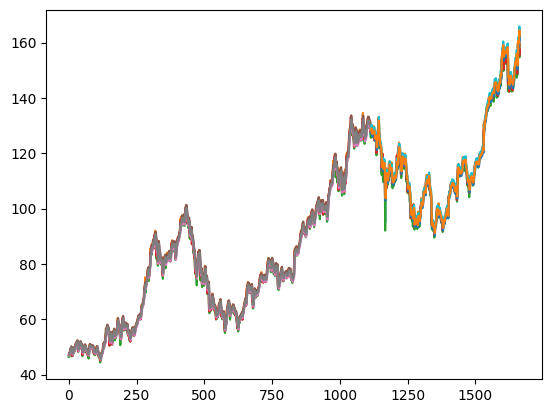

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()